findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

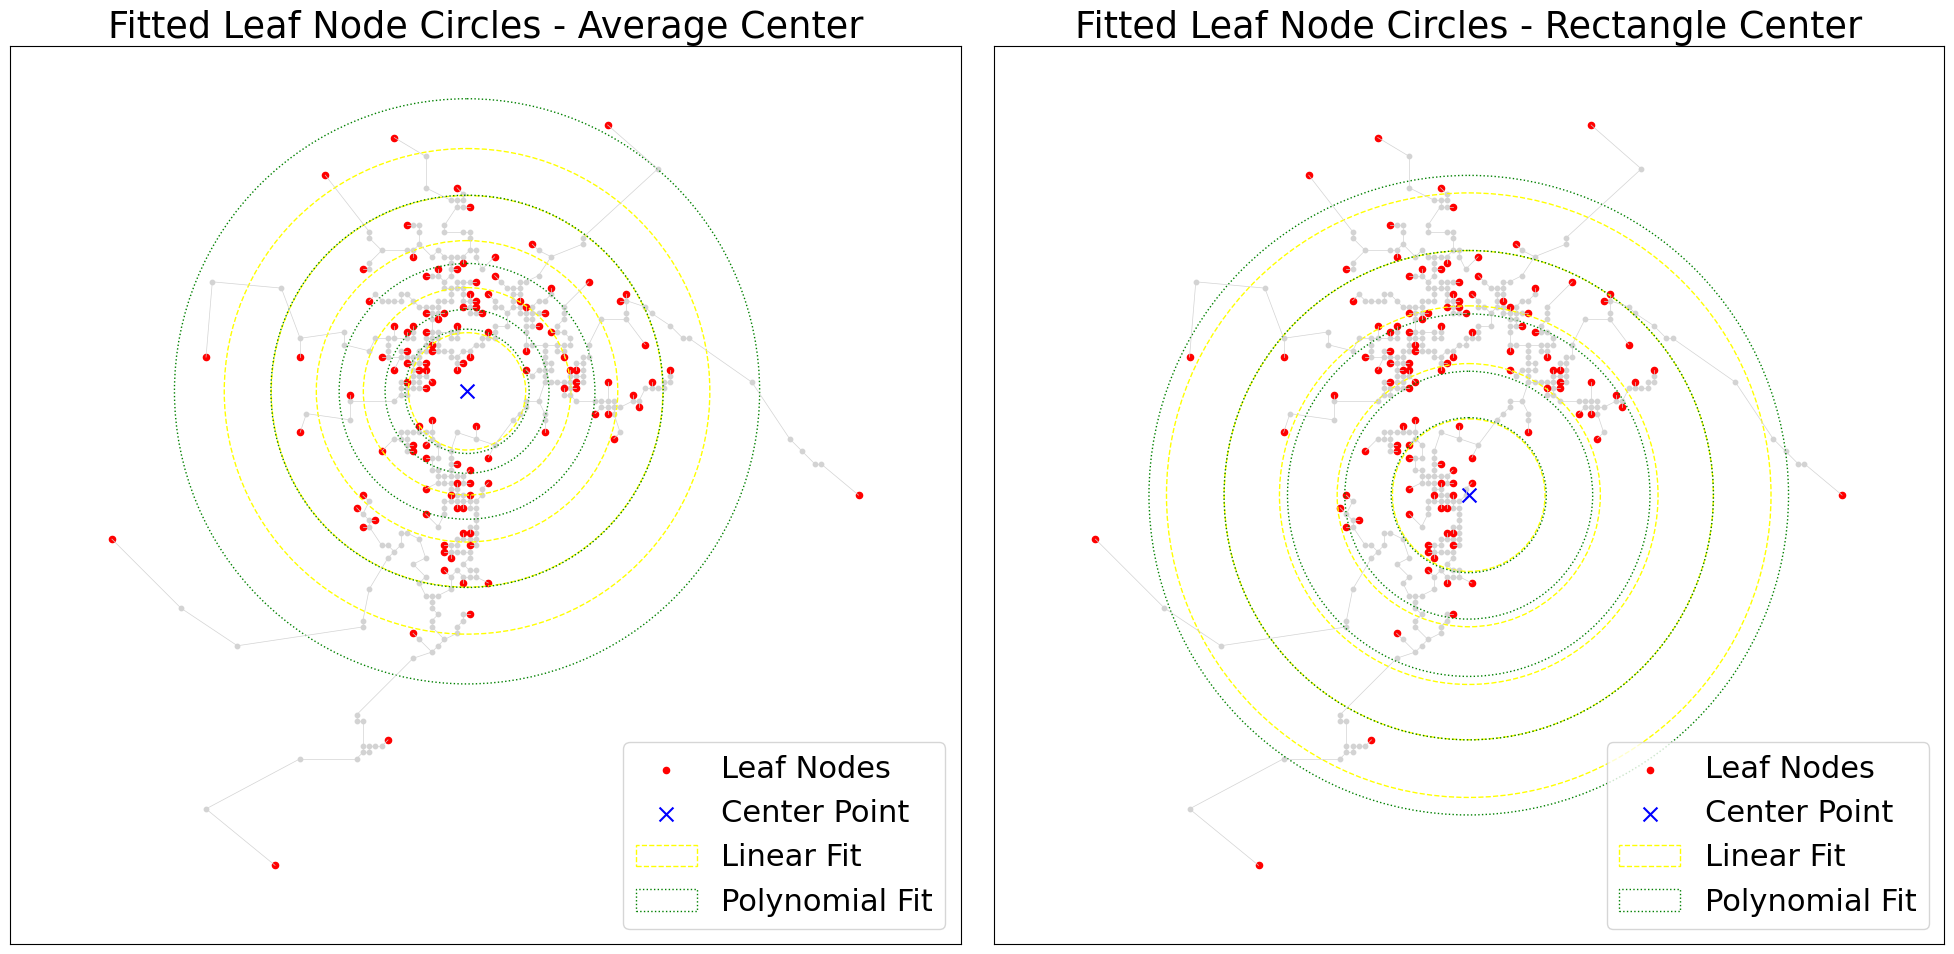

In [2]:
from graph_tool.all import Graph, graph_draw
import numpy as np
import python_codes.files_operators as fo
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 设置字体和比例
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

# 读取网络文件
filename = "./MST_net/tokyo_pop_500_mst.net"
read_graph, read_pos = fo.read_files(filename)

# 找出叶节点（只有一个相邻节点的节点）
leaf_nodes = [v for v in read_graph.vertices() if v.out_degree() == 1]
leaf_positions = np.array([read_pos[v] for v in leaf_nodes])

# 计算中心点
center_avg = np.mean(leaf_positions, axis=0)  # 平均值中心
x_min, y_min = np.min(leaf_positions, axis=0)
x_max, y_max = np.max(leaf_positions, axis=0)
center_rect = np.array([(x_min + x_max) / 2, (y_min + y_max) / 2])  # 最小矩形中心

# 绘制叶节点及同心圆结构
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 缩小比例

for ax, center, title in zip(axs, [center_avg, center_rect], ["Average Center", "Rectangle Center"]):
    # 计算叶节点距离中心点的距离
    distances = np.linalg.norm(leaf_positions - center, axis=1)
    sorted_distances = np.sort(distances)
    num_points = len(sorted_distances)

    # 线性拟合
    X = np.arange(1, num_points + 1).reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, sorted_distances)
    linear_fitted = linear_regressor.predict(X)

    # 多项式拟合（使用二次拟合）
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_poly, sorted_distances)
    poly_fitted = poly_regressor.predict(X_poly)

    # 绘制整个网络（灰色节点和边）
    for edge in read_graph.edges():
        source = read_pos[edge.source()]
        target = read_pos[edge.target()]
        ax.plot([source[0], target[0]], [source[1], target[1]], color="lightgray", linewidth=0.5)

    # 绘制所有节点（灰色）
    for v in read_graph.vertices():
        pos = read_pos[v]
        ax.scatter(pos[0], pos[1], color="lightgray", s=10)

    # 绘制叶节点（红色）
    ax.scatter(leaf_positions[:, 0], leaf_positions[:, 1], color="red", label="Leaf Nodes", s=20)

    # 绘制中心点（蓝色）
    ax.scatter(center[0], center[1], color="blue", marker="x", s=100, label="Center Point")

    # 绘制线性拟合的同心圆
    for i in range(1, 6):
        radius = linear_fitted[int((i / 5) * num_points) - 1]
        circle = plt.Circle(center, radius, color="yellow", fill=False, linestyle="--", label="Linear Fit" if i == 1 else "")
        ax.add_artist(circle)

    # 绘制多项式拟合的同心圆
    for i in range(1, 6):
        radius = poly_fitted[int((i / 5) * num_points) - 1]
        circle = plt.Circle(center, radius, color="green", fill=False, linestyle=":", label="Polynomial Fit" if i == 1 else "")
        ax.add_artist(circle)

    ax.set_title(f"Fitted Leaf Node Circles - {title}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='datalim')  # 保持比例
    ax.invert_yaxis()
    ax.legend()

plt.tight_layout()
plt.show()


Average Center: 自动识别出 1 个圆环
Rectangle Center: 自动识别出 1 个圆环


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

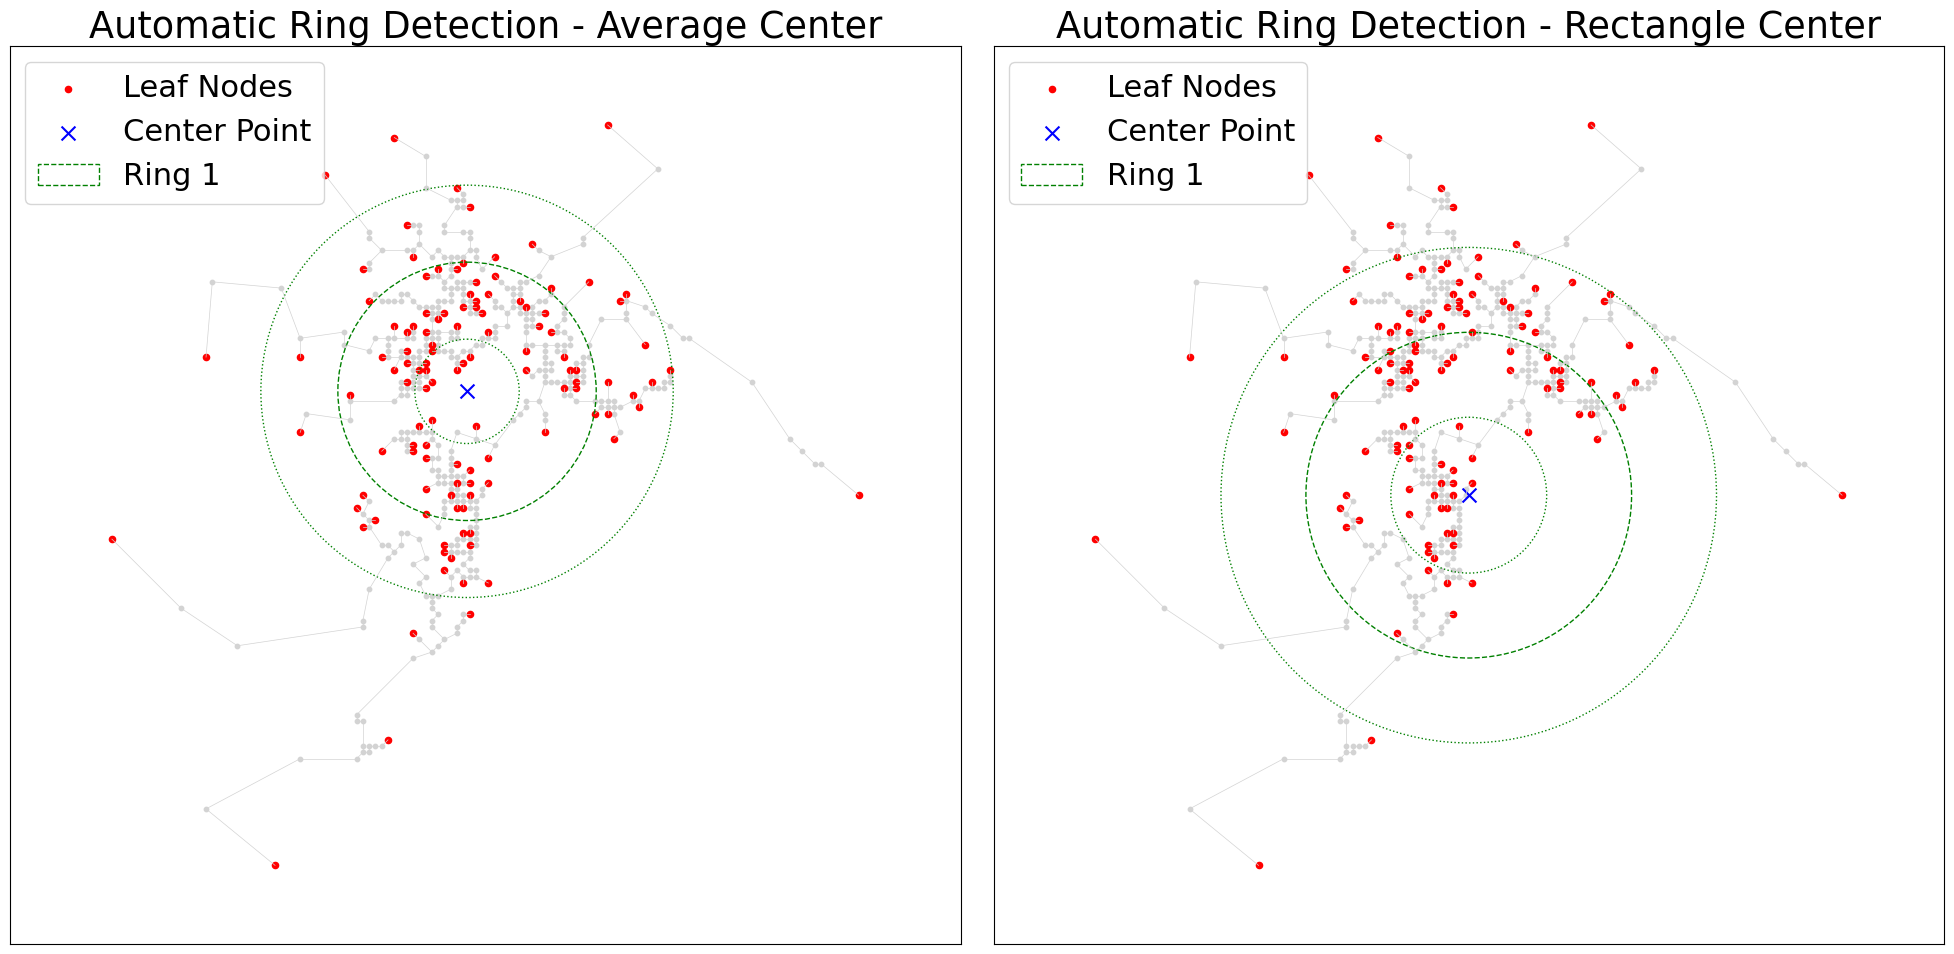

In [5]:
from graph_tool.all import Graph, graph_draw
import numpy as np
import python_codes.files_operators as fo
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# 设置字体和比例
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

# 读取网络文件
filename = "./MST_net/tokyo_pop_500_mst.net"
read_graph, read_pos = fo.read_files(filename)

# 找出叶节点（只有一个相邻节点的节点）
leaf_nodes = [v for v in read_graph.vertices() if v.out_degree() == 1]
leaf_positions = np.array([read_pos[v] for v in leaf_nodes])

# 计算两种中心点
center_avg = np.mean(leaf_positions, axis=0)  # 平均值中心
x_min, y_min = np.min(leaf_positions, axis=0)
x_max, y_max = np.max(leaf_positions, axis=0)
center_rect = np.array([(x_min + x_max) / 2, (y_min + y_max) / 2])  # 最小矩形中心

# 绘制两个中心点的图像对比
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 调整比例

for ax, center, title in zip(axs, [center_avg, center_rect], ["Average Center", "Rectangle Center"]):
    # 计算叶节点距离中心点的距离
    distances = np.linalg.norm(leaf_positions - center, axis=1)

    # 使用DBSCAN进行聚类识别圆环结构
    db = DBSCAN(eps=20, min_samples=5).fit(distances.reshape(-1, 1))  # 20是距离阈值，5是最小样本数
    labels = db.labels_

    # 计算识别的圆环数量
    num_circles = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"{title}: 自动识别出 {num_circles} 个圆环")

    # 绘制整个网络（灰色节点和边）
    for edge in read_graph.edges():
        source = read_pos[edge.source()]
        target = read_pos[edge.target()]
        ax.plot([source[0], target[0]], [source[1], target[1]], color="lightgray", linewidth=0.5)

    # 绘制所有节点（灰色）
    for v in read_graph.vertices():
        pos = read_pos[v]
        ax.scatter(pos[0], pos[1], color="lightgray", s=10)

    # 绘制叶节点（红色）
    ax.scatter(leaf_positions[:, 0], leaf_positions[:, 1], color="red", label="Leaf Nodes", s=20)

    # 绘制中心点（蓝色）
    ax.scatter(center[0], center[1], color="blue", marker="x", s=100, label="Center Point")

    # 绘制自动识别的圆环
    for circle_label in set(labels):
        if circle_label == -1:
            continue  # 跳过噪声点
        cluster_indices = np.where(labels == circle_label)[0]
        cluster_distances = distances[cluster_indices]
        mean_radius = np.mean(cluster_distances)
        std_radius = np.std(cluster_distances)

        # 绘制平均半径圆环
        circle = plt.Circle(center, mean_radius, color="green", fill=False, linestyle="--", label=f"Ring {circle_label+1}")
        ax.add_artist(circle)
        
        # 绘制标准差范围
        circle_inner = plt.Circle(center, mean_radius - std_radius, color="green", fill=False, linestyle=":")
        circle_outer = plt.Circle(center, mean_radius + std_radius, color="green", fill=False, linestyle=":")
        ax.add_artist(circle_inner)
        ax.add_artist(circle_outer)

    ax.set_title(f"Automatic Ring Detection - {title}")
    ax.set_xticks([])  # 去除X坐标刻度
    ax.set_yticks([])  # 去除Y坐标刻度
    ax.set_aspect('equal', adjustable='datalim')  # 保持比例
    ax.invert_yaxis()  # 上下翻转Y轴，解决图像倒置问题
    ax.legend()

plt.tight_layout()
plt.show()


Average Center: 自动识别出 10 个圆环
Rectangle Center: 自动识别出 10 个圆环


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

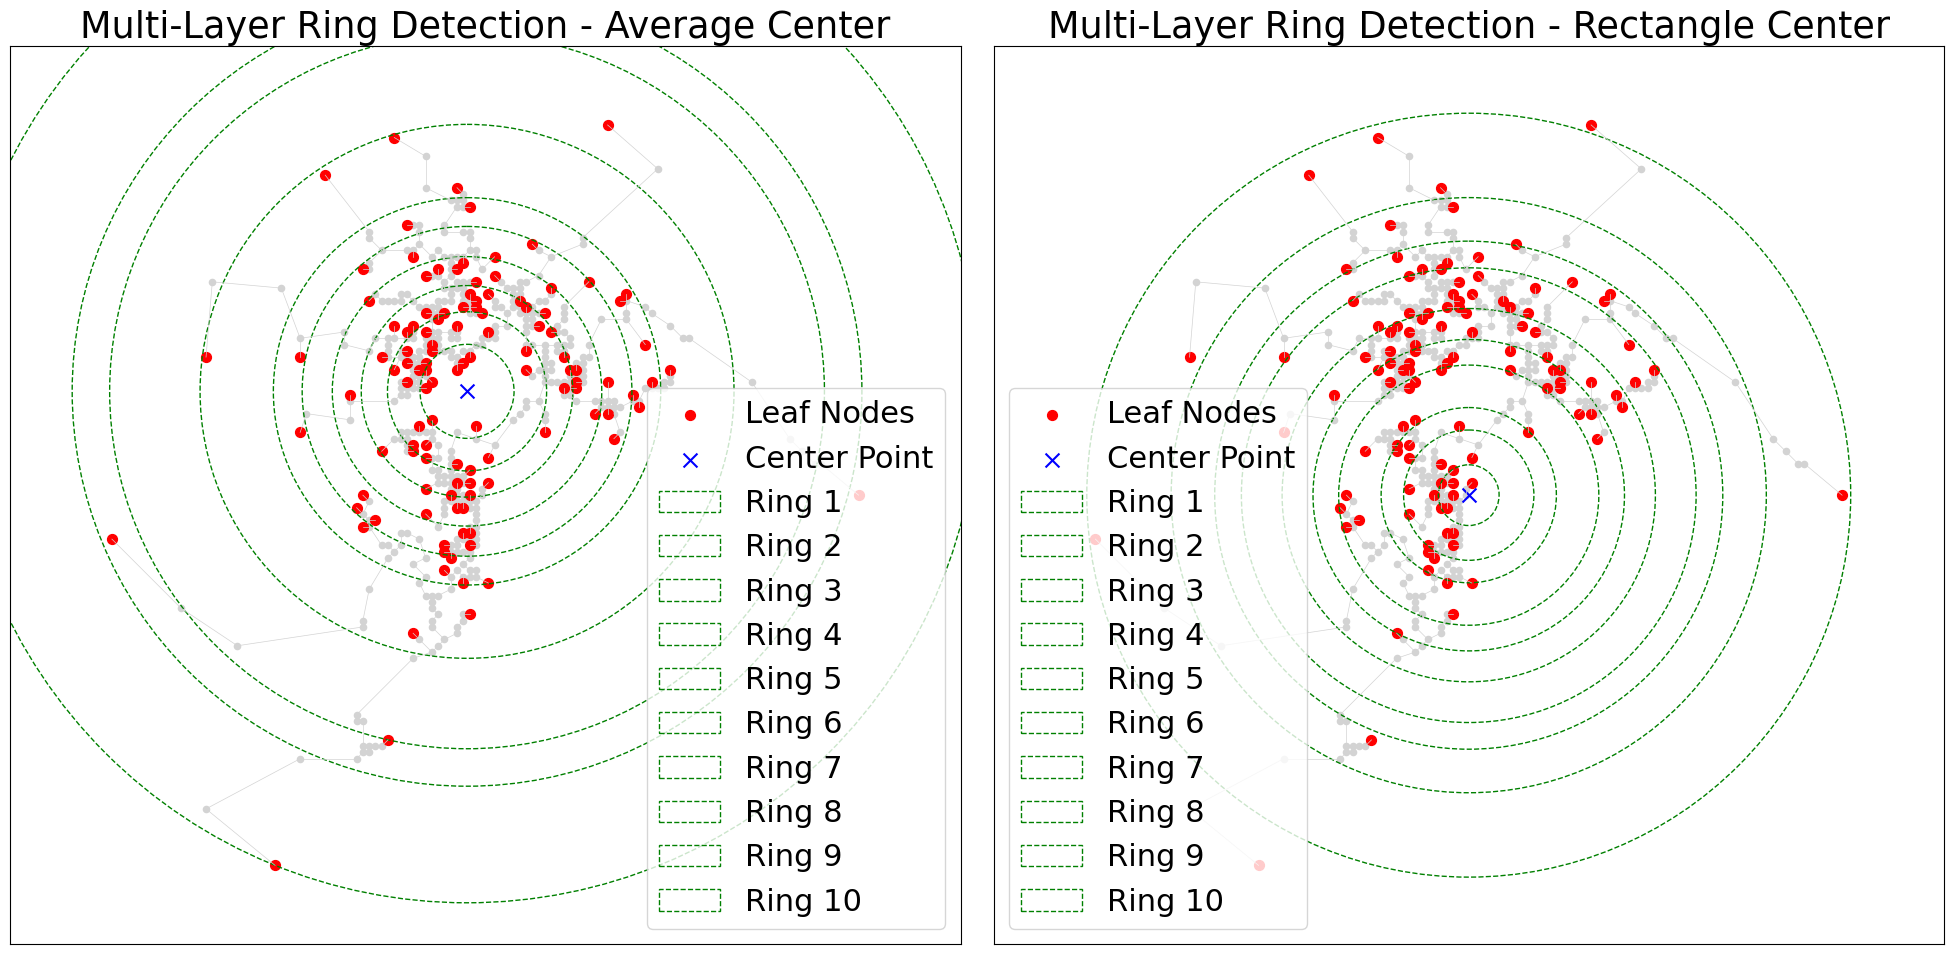

In [6]:
from graph_tool.all import Graph, graph_draw
import numpy as np
import python_codes.files_operators as fo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 设置字体和比例
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

# 读取网络文件
filename = "./MST_net/tokyo_pop_500_mst.net"
read_graph, read_pos = fo.read_files(filename)

# 找出叶节点（只有一个相邻节点的节点）
leaf_nodes = [v for v in read_graph.vertices() if v.out_degree() == 1]
leaf_positions = np.array([read_pos[v] for v in leaf_nodes])

# 计算两种中心点
center_avg = np.mean(leaf_positions, axis=0)  # 平均值中心
x_min, y_min = np.min(leaf_positions, axis=0)
x_max, y_max = np.max(leaf_positions, axis=0)
center_rect = np.array([(x_min + x_max) / 2, (y_min + y_max) / 2])  # 最小矩形中心

# 绘制两个中心点的图像对比
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for ax, center, title in zip(axs, [center_avg, center_rect], ["Average Center", "Rectangle Center"]):
    # 计算叶节点距离中心点的距离
    distances = np.linalg.norm(leaf_positions - center, axis=1)
    
    # 选择合理的圆环数量（KMeans自动聚类）
    optimal_clusters = min(10, len(leaf_positions) // 10)  # 自动设定聚类数量
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(distances.reshape(-1, 1))
    labels = kmeans.labels_

    # 聚类中心（圆环半径）
    cluster_centers = kmeans.cluster_centers_
    sorted_centers = np.sort(cluster_centers.flatten())  # 从大到小排序

    print(f"{title}: 自动识别出 {len(sorted_centers)} 个圆环")

    # 绘制整个网络（灰色节点和边）
    for edge in read_graph.edges():
        source = read_pos[edge.source()]
        target = read_pos[edge.target()]
        ax.plot([source[0], target[0]], [source[1], target[1]], color="lightgray", linewidth=0.5)

    # 绘制所有节点（灰色）
    for v in read_graph.vertices():
        pos = read_pos[v]
        ax.scatter(pos[0], pos[1], color="lightgray", s=20)

    # 绘制叶节点（红色）
    ax.scatter(leaf_positions[:, 0], leaf_positions[:, 1], color="red", label="Leaf Nodes", s=50)

    # 绘制中心点（蓝色）
    ax.scatter(center[0], center[1], color="blue", marker="x", s=100, label="Center Point")

    # 绘制自动识别的圆环
    for i, radius in enumerate(sorted_centers):
        circle = plt.Circle(center, radius, color="green", fill=False, linestyle="--", label=f"Ring {i+1}")
        ax.add_artist(circle)

    ax.set_title(f"Multi-Layer Ring Detection - {title}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='datalim')
    ax.invert_yaxis()
    ax.legend()

plt.tight_layout()
plt.show()
